In [189]:
import os
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

home = '/home/kojo/Code/Alz_trVAE'
os.chdir(home)

In [190]:
source = "WT"
target = "HET"
combination = 'U'
normalized = False
cellType = "all"
condition_key = "Group"

In [191]:
trvae_reconstructed = sc.read(f"./data/reconstructed/trVAE_alzPro/{cellType}_{source}_to_{target}_{'norm' if normalized else 'count'}_{combination}.h5ad")
trvae_reconstructed.obs

,Qi ID,sex,Group,Timepoint,Validation,batch
8-0,3346,F,WT_to_HET,all,Test,0
9-0,3347,F,WT_to_HET,all,Train,0
10-0,3388,F,WT_to_HET,all,Train,0
11-0,3389,F,WT_to_HET,all,Train,0
12-0,3606,M,WT_to_HET,all,Test,0
13-0,3607,M,WT_to_HET,all,Train,0
14-0,3608,M,WT_to_HET,all,Train,0
15-0,3609,M,WT_to_HET,all,Train,0
18-0,3003,F,WT_to_HET,all,Test,0
25-0,3392,M,WT_to_HET,all,Test,0


In [192]:
trvae_reconstructed

AnnData object with n_obs × n_vars = 48 × 2969
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'Validation', 'batch'

In [193]:
dist1 = trvae_reconstructed[trvae_reconstructed.obs[condition_key] == f"{source}_to_{target}"]
dist1.obs

,Qi ID,sex,Group,Timepoint,Validation,batch
8-0,3346,F,WT_to_HET,all,Test,0
9-0,3347,F,WT_to_HET,all,Train,0
10-0,3388,F,WT_to_HET,all,Train,0
11-0,3389,F,WT_to_HET,all,Train,0
12-0,3606,M,WT_to_HET,all,Test,0
13-0,3607,M,WT_to_HET,all,Train,0
14-0,3608,M,WT_to_HET,all,Train,0
15-0,3609,M,WT_to_HET,all,Train,0
18-0,3003,F,WT_to_HET,all,Test,0
25-0,3392,M,WT_to_HET,all,Test,0


In [194]:
dist1

View of AnnData object with n_obs × n_vars = 24 × 2969
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'Validation', 'batch'

In [195]:
dist2 = trvae_reconstructed[trvae_reconstructed.obs[condition_key] == target]
dist2.obs

,Qi ID,sex,Group,Timepoint,Validation,batch
0-1,3131,M,HET,3m,Test,1
1-1,3132,M,HET,3m,Train,1
2-1,3140,M,HET,3m,Train,1
3-1,3141,M,HET,3m,Train,1
4-1,3153,F,HET,3m,Test,1
5-1,3154,F,HET,3m,Train,1
6-1,3156,F,HET,3m,Train,1
7-1,3157,F,HET,3m,Train,1
16-1,2997,M,HET,6m,Test,1
17-1,2998,M,HET,6m,Train,1


In [196]:
dist2

View of AnnData object with n_obs × n_vars = 24 × 2969
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'Validation', 'batch'

In [197]:
lows = {i: dist1.var.index[i] for i in range(len(dist1.X[0])) if sum(dist1.X[:, i]) == 0}
lows

{1: 'A2A5R2|BIG2',
 3: 'A2A7S8|K1522',
 7: 'A2AG50|MA7D2',
 9: 'A2AJA9|AJM1',
 14: 'A2AN08|UBR4',
 15: 'A2AP18|PLCH2',
 17: 'A2APX8|SCN1A',
 22: 'A2ASZ8|SCMC2',
 23: 'A2AVR2|MROH7',
 31: 'B1AVY7|KI16B',
 37: 'B2RXS4|PLXB2',
 38: 'B2RY50|ARMC4',
 44: 'C0HK79|ARXS1',
 48: 'D3YZP9|CCDC6',
 54: 'E9Q414|APOB',
 55: 'E9Q4N7|ARI1B',
 57: 'E9Q4Z2|ACACB',
 59: 'E9Q6P5|TTC7B',
 61: 'E9Q7X7|NRX2A',
 62: 'E9Q8I9|FRY',
 64: 'F6ZDS4|TPR',
 66: 'G3UYX5|RGS22',
 69: 'G5E872|RNPL1',
 71: 'G5E8P0|GCP6',
 82: 'O08663|MAP2',
 83: 'O08688|CAN5',
 97: 'O08989|RASM',
 100: 'O09044|SNP23',
 111: 'O35114|SCRB2',
 119: 'O35239|PTN9',
 127: 'O35345|IMA7',
 128: 'O35350|CAN1',
 137: 'O35598|ADA10',
 139: 'O35621|PMM1',
 140: 'O35633|VIAAT',
 141: 'O35639|ANXA3',
 145: 'O35681|SYT3',
 147: 'O35683|NDUA1',
 150: 'O35841|API5',
 154: 'O35887|CALU',
 155: 'O35900|LSM2',
 166: 'O54887|TSKS',
 167: 'O54901|OX2G',
 170: 'O54946|DNJB6',
 182: 'O55033|NCK2',
 186: 'O55091|IMPCT',
 193: 'O55142|RL35A',
 195: 'O55186|CD59A'

In [198]:
lows_list = {lows[key]:(sum(dist2.X[:, key])/8) for key in lows.keys()}
lows_list = sorted(lows_list.items(), reverse=True, key=lambda item: item[1])
lows_list

[('P11798|KCC2A', 97750000.0),
 ('P48962|ADT1', 62031250.0),
 ('P16125|LDHB', 51180000.0),
 ('Q63810|CANB1', 25308750.0),
 ('P97427|DPYL1', 23176250.0),
 ('Q8BMF4|ODP2', 22272500.0),
 ('P00405|COX2', 19947500.0),
 ('Q9CPQ8|ATP5L', 15726250.0),
 ('Q9CR68|UCRI', 13598750.0),
 ('Q8K2B3|SDHA', 12441875.0),
 ('P10852|4F2', 12055000.0),
 ('Q9JKC6|CEND', 10872375.0),
 ('Q78IK2|USMG5', 10532875.0),
 ('P43277|H13', 10324250.0),
 ('P58252|EF2', 8921625.0),
 ('P19246|NFH', 8717250.0),
 ('P67778|PHB', 8158750.0),
 ('Q9EQF6|DPYL5', 8103250.0),
 ('Q9EQH3|VPS35', 7794375.0),
 ('Q9CPP6|NDUA5', 7711500.0),
 ('Q6ZPE2|MTMR5', 6909875.0),
 ('P00493|HPRT', 6257750.0),
 ('P62264|RS14', 5863875.0),
 ('O35633|VIAAT', 5740125.0),
 ('P80317|TCPZ', 5716375.0),
 ('Q8R5H6|WASF1', 5682125.0),
 ('P60766|CDC42', 5670375.0),
 ('P18572|BASI', 5393375.0),
 ('P46097|SYT2', 5325575.0),
 ('P58281|OPA1', 5151500.0),
 ('Q9CQI3|GMFB', 5059875.0),
 ('Q02105|C1QC', 5001250.0),
 ('Q99JY8|PLPP3', 4862750.0),
 ('Q9QXV0|PCSK1', 455

In [199]:
highs = {i: dist2.var.index[i] for i in range(len(dist2.X[0])) if sum(dist2.X[:, i]) == 0}

if len(highs) < 100:
    sum_dict = {}
    for i in range(len(dist2.X[0])):
        sum_dict[(i, dist2.var.index[i])] = sum(dist2.X[:, i])
    highs = {val[0][0]: val[0][1] for val in sorted(sum_dict.items(), key = lambda x: x[1])[:100]}
highs

{2237: 'Q99L27|GMPR2',
 2815: 'Q9R0M6|RAB9A',
 2662: 'Q9ERL9|GCYA1',
 234: 'O88533|DDC',
 1956: 'Q8K4P0|WDR33',
 2474: 'Q9D1E8|PLCE',
 119: 'O35239|PTN9',
 2855: 'Q9WTU3|SCN8A',
 1153: 'Q3URD3|SLMAP',
 1938: 'Q8K2C6|SIR5',
 1430: 'Q6IR34|GPSM1',
 1296: 'Q61335|BAP31',
 2133: 'Q91YS8|KCC1A',
 1632: 'Q80XA6|REPS2',
 1901: 'Q8CI95|OSB11',
 332: 'P09925|SURF1',
 2829: 'Q9R112|SQOR',
 2645: 'Q9EQP2|EHD4',
 2136: 'Q91YX5|LGAT1',
 1592: 'Q80TL7|MON2',
 2307: 'Q9CQ79|TXND9',
 1103: 'Q3TIU4|PDE12',
 1754: 'Q8BP40|PPA6',
 1105: 'Q3TLH4|PRC2C',
 2617: 'Q9DCT1|AKCL2',
 2654: 'Q9ER88|RT29',
 1119: 'Q3U487|HECD3',
 1141: 'Q3UJB9|EDC4',
 1147: 'Q3UMT1|PP12C',
 999: 'P97445|CAC1A',
 2011: 'Q8R4E6|PURG',
 1289: 'Q61239|FNTA',
 1565: 'Q7TNV0|DEK',
 2370: 'Q9CRB2|NHP2',
 2020: 'Q8R5L3|VPS39',
 2718: 'Q9JKL4|NDUF3',
 1540: 'Q78J03|MSRB2',
 1265: 'Q60967|PAPS1',
 71: 'G5E8P0|GCP6',
 1429: 'Q6IFX2|K1C42',
 2852: 'Q9WTR1|TRPV2',
 1438: 'Q6NS82|RETR2',
 1095: 'Q3TDQ1|STT3B',
 1480: 'Q6PDI5|ECM29',
 511: 'P285

In [200]:
highs_list = {highs[key]:(sum(dist1.X[:, key])/8) for key in highs.keys()}
highs_list = sorted(highs_list.items(), reverse=True, key=lambda item: item[1])
highs_list

[('Q61464|ZN638', 32340.891723632812),
 ('Q9CRB2|NHP2', 21475.862426757812),
 ('Q8VEJ9|VPS4A', 21353.80340576172),
 ('Q9WTR1|TRPV2', 18841.4248046875),
 ('Q8K2C6|SIR5', 15077.44418334961),
 ('Q99L27|GMPR2', 0.0),
 ('Q9R0M6|RAB9A', 0.0),
 ('Q9ERL9|GCYA1', 0.0),
 ('O88533|DDC', 0.0),
 ('Q8K4P0|WDR33', 0.0),
 ('Q9D1E8|PLCE', 0.0),
 ('O35239|PTN9', 0.0),
 ('Q9WTU3|SCN8A', 0.0),
 ('Q3URD3|SLMAP', 0.0),
 ('Q6IR34|GPSM1', 0.0),
 ('Q61335|BAP31', 0.0),
 ('Q91YS8|KCC1A', 0.0),
 ('Q80XA6|REPS2', 0.0),
 ('Q8CI95|OSB11', 0.0),
 ('P09925|SURF1', 0.0),
 ('Q9R112|SQOR', 0.0),
 ('Q9EQP2|EHD4', 0.0),
 ('Q91YX5|LGAT1', 0.0),
 ('Q80TL7|MON2', 0.0),
 ('Q9CQ79|TXND9', 0.0),
 ('Q3TIU4|PDE12', 0.0),
 ('Q8BP40|PPA6', 0.0),
 ('Q3TLH4|PRC2C', 0.0),
 ('Q9DCT1|AKCL2', 0.0),
 ('Q9ER88|RT29', 0.0),
 ('Q3U487|HECD3', 0.0),
 ('Q3UJB9|EDC4', 0.0),
 ('Q3UMT1|PP12C', 0.0),
 ('P97445|CAC1A', 0.0),
 ('Q8R4E6|PURG', 0.0),
 ('Q61239|FNTA', 0.0),
 ('Q7TNV0|DEK', 0.0),
 ('Q8R5L3|VPS39', 0.0),
 ('Q9JKL4|NDUF3', 0.0),
 ('Q78J03

In [201]:
print(sum(dist1.X[:, 0]))
print(dist1.var.index[0])

4997133.234375
A2A432|CUL4B


In [202]:
protein_meansR = {}
for i in range(len(dist2.X[0])):
    protein_meansR[dist2.var.index[i]] = sum(dist2.X[:,i])/len(dist2.X[:,i])

print(min(protein_meansR.values()))

1139.9166666666667


In [203]:
protein_meansP = {}
for i in range(len(dist1.X[0])):
    protein_meansP[dist1.var.index[i]] = sum(dist1.X[:,i])/len(dist1.X[:,i])

print(min(protein_meansP.values()))

0.0


In [204]:
len(list(protein_meansP.keys()))

2969

In [205]:
len(list(protein_meansR.keys()))

2969

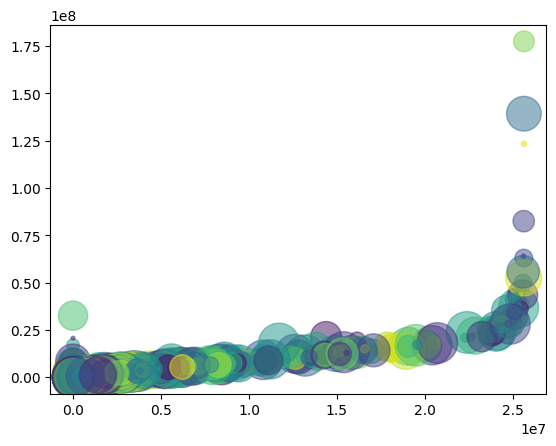

In [206]:
np.random.seed(2432532)

N = len(dist1.X[0])
#x = list(protein_meansP.keys())
x = [sum(dist1.X[:,i])/len(dist1.X[:,i]) for i in range(len(dist1.X[0]))]
#y = list(protein_meansR.keys())
y = [sum(dist2.X[:,i])/len(dist2.X[:,i]) for i in range(len(dist1.X[0]))]
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

In [207]:
protein_diffs = {}
for i in range(len(protein_meansP)):
    protein_diffs[dist1.var.index[i]] = abs(sum(dist1.X[:,i])/len(dist1.X[:,i]) - sum(dist2.X[:,i])/len(dist2.X[:,i]))

print(max(protein_diffs.values()))

151947714.5


In [208]:
protein_tests = sorted(protein_diffs.items(), reverse=True, key = lambda x: x[1])
# Potentially significant proteins
with open(f"./results/alzPro/{cellType}_{source}_to_{target}_{'norm' if normalized else 'count'}_{combination}_significant_protein_diffs.txt", "w") as f:
    for protein in protein_tests:
        f.writelines(f"{protein[0]}: {protein[1]}\n")
protein_tests

[('P60202|MYPR', 151947714.5),
 ('P16858|G3P', 113687499.49999999),
 ('P04370|MBP', 97810677.25),
 ('P63260|ACTG', 56904457.33333333),
 ('P14094|AT1B1', 38367226.41666667),
 ('O08553|DPYL2', 37388572.83333333),
 ('P11798|KCC2A', 32583333.333333332),
 ('Q04447|KCRB', 30198992.666666668),
 ('P63101|1433Z', 26940034.833333336),
 ('P05064|ALDOA', 24475504.499999996),
 ('P56480|ATPB', 24262816.666666668),
 ('P48962|ADT1', 20677083.333333332),
 ('Q6PIC6|AT1A3', 18553433.666666664),
 ('P52480|KPYM', 18055278.333333336),
 ('Q91XV3|BASP1', 17685939.416666668),
 ('P16125|LDHB', 17060000.0),
 ('P0DP27|CALM2', 16179760.083333336),
 ('Q64332|SYN2', 15763185.583333332),
 ('P08249|MDHM', 13730807.833333332),
 ('P16330|CN37', 13211586.0),
 ('P14152|MDHC', 11581872.083333336),
 ('P17182|ENOA', 10866437.833333336),
 ('P62806|H4', 10828701.333333332),
 ('P43006|EAA2', 10357365.916666668),
 ('Q03265|ATPA', 9333587.249999996),
 ('Q63810|CANB1', 8436250.0),
 ('P97427|DPYL1', 7725416.666666667),
 ('Q8BMF4|OD

In [209]:
protein_ttest = {}
count = 0
for i in range(len(protein_meansP)):
    ttest = stats.ttest_ind(dist1.X[:,i], dist2.X[:,i])
    protein_ttest[dist1.var.index[i]] = ttest.statistic

print(min(protein_ttest.values()))

-18.228135961748453


In [210]:
protein_tests = sorted(protein_ttest.items(), key = lambda x: x[1])
# Potentially significant proteins
with open(f"./results/alzPro/{cellType}_{source}_to_{target}_{'norm' if normalized else 'count'}_{combination}_significant_protein_ttests.txt", "w") as f:
    for protein in protein_tests:
        f.writelines(f"{protein[0]}: {protein[1]}\n")
protein_tests

[('Q9QZ06|TOLIP', -18.228135961748453),
 ('Q62419|SH3G1', -18.052463045531997),
 ('P61202|CSN2', -15.969983793015366),
 ('P24288|BCAT1', -14.964935717130441),
 ('Q8VCW8|ACSF2', -14.259961656274006),
 ('P68037|UB2L3', -14.181161476884993),
 ('P56380|AP4A', -13.180630394065322),
 ('Q9R1P1|PSB3', -12.599927498802534),
 ('P58252|EF2', -12.503184969038216),
 ('Q6R0H7|GNAS1', -12.304210686563637),
 ('Q9EQH3|VPS35', -11.71896159988901),
 ('Q06138|CAB39', -11.560586004453938),
 ('O88746|TOM1', -11.560193661195472),
 ('P00493|HPRT', -11.55359142017614),
 ('Q9Z1X4|ILF3', -11.32084035055776),
 ('Q9CR68|UCRI', -11.222727225266286),
 ('P60766|CDC42', -11.208631935379223),
 ('P31230|AIMP1', -11.141116772268465),
 ('Q9QXV0|PCSK1', -11.082105113510448),
 ('P10852|4F2', -10.955858146602791),
 ('Q9QWI6|SRCN1', -10.954280895253797),
 ('Q9ER00|STX12', -10.94372183099408),
 ('P80317|TCPZ', -10.806678559453704),
 ('O89051|ITM2B', -10.77941280275513),
 ('Q8K1Z0|COQ9', -10.652642497199414),
 ('P40336|VP26A', 

In [211]:
means = pd.DataFrame(list(zip(x, y)), columns=['Predicted', 'Actual'])
means.head()

,Predicted,Actual
0,208213.884766,178225.000000
1,0.000000,20254.166667
2,390845.958333,358158.333333
3,0.000000,8366.666667
4,154841.302083,114208.333333


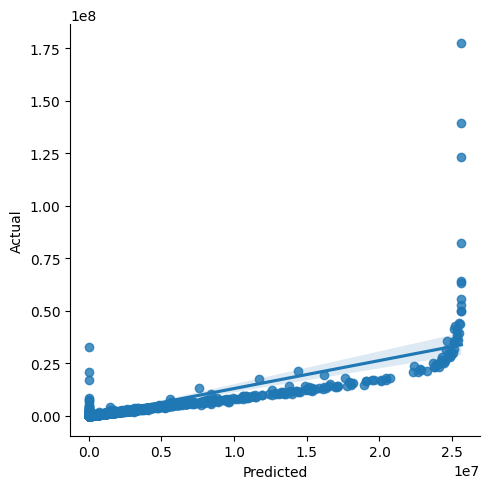

In [212]:
import seaborn as sb

sb.lmplot(x='Predicted', y='Actual', data=means)

In [215]:
stats.pearsonr(x, y)

(0.7813690064427729, 0.0)

In [216]:
stats.spearmanr(x, y)

SpearmanrResult(correlation=0.8966099241102505, pvalue=0.0)